# Part-of-speech tagging

Part-of-speech (POS) tagging is the process of labeling each word in a text corpus with its grammatical category, such as noun, verb, adjective, etc. POS tagging helps machines understand the structure of text, which in turn proves useful for tasks such as sentiment analysis or text classification.

During this lab we will be using Python, the pandas and NLTK libraries to explore POS tagging techniques and apply them to real-world text data.

Useful nltk PoS documentation - https://www.nltk.org/book/ch05.html

### Intro

In [12]:
# @title Import Prerequisites { display-mode: "form" }
import nltk
import pandas as pd
from IPython.display import display

# Download the necessary NLTK data
nltk.download('punkt', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('universal_tagset', quiet=True)

print('Imported prerequisites')

Imported prerequisites


In [13]:
# @title Tagging demo { display-mode: "form" }

# Sample text
text = "I like to eat pizza and play video games with my friends."
print('Raw text:', text)

# Tokenize the text
tokens = nltk.word_tokenize(text)
print('Tokenized text:', tokens)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens)

# Explicitly display the pos_tags in a Jupyter-like format
print()
print('Tagged text:', pos_tags)

Raw text: I like to eat pizza and play video games with my friends.
Tokenized text: ['I', 'like', 'to', 'eat', 'pizza', 'and', 'play', 'video', 'games', 'with', 'my', 'friends', '.']

Tagged text: [('I', 'PRP'), ('like', 'VBP'), ('to', 'TO'), ('eat', 'VB'), ('pizza', 'NN'), ('and', 'CC'), ('play', 'VB'), ('video', 'NN'), ('games', 'NNS'), ('with', 'IN'), ('my', 'PRP$'), ('friends', 'NNS'), ('.', '.')]


In [14]:
# @title Convert to DataFrame
# Convert PoS tags to a DataFrame
pos_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS'])
display(pos_df.head())

,Word,PoS
0,I,PRP
1,like,VBP
2,to,TO
3,eat,VB
4,pizza,NN


In [15]:
# @title Count tag frequency
# Count the frequency of each PoS tag and convert it to a dataframe
counts_df = pos_df.groupby('PoS').size().reset_index(name='Count')
display(counts_df)

,PoS,Count
0,.,1
1,CC,1
2,IN,1
3,NN,2
4,NNS,2
5,PRP,1
6,PRP$,1
7,TO,1
8,VB,2
9,VBP,1


NLTK by default uses the Penn Treebank tagset. This tagset is one of the most widely used in English language corpus linguistics. It includes a detailed set of part-of-speech tags, including distinctions among different types of nouns, verbs, adjectives, adverbs, and various punctuation marks, among others.

Here are some examples of tags from the Penn Treebank tagset:

*   NN: Noun, singular or mass
*   NNS: Noun, plural
*   NNP: Proper noun, singular
*   NNPS: Proper noun, plural

**We will, however, switch to the simpler universal_tagset for the remainder of this laboratory.** It helps unify multiple tagsets by allowing conversion from them into the universal_tagset. To do so, simply specify the tagset=universal_tagset when performing tagging.

### POS applied to Jane Austen

In [16]:
# @title Create POS DataFrame { display-mode: "form" }
import requests
import string

# Pride and Prejudice
book_url = 'https://www.gutenberg.org/cache/epub/1342/pg1342.txt'
response = requests.get(book_url)
pride_prejudice = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
pride_prejudice = ''.join(c for c in pride_prejudice if c in allowed_chars)

# Tokenize the text
tokens = nltk.word_tokenize(pride_prejudice)

# Perform PoS tagging
pos_tags = nltk.pos_tag(tokens, tagset='universal')
pos_tags

# Convert PoS tags to a DataFrame
pride_prejudice_df = pd.DataFrame(pos_tags, columns=['Word', 'PoS']).rename_axis('index')
display(pride_prejudice_df)

,Word,PoS
index,,
0,The,DET
1,Project,NOUN
2,Gutenberg,NOUN
3,eBook,NOUN
4,of,ADP
...,...,...
130451,to,PRT
130452,hear,VERB
130453,about,ADP


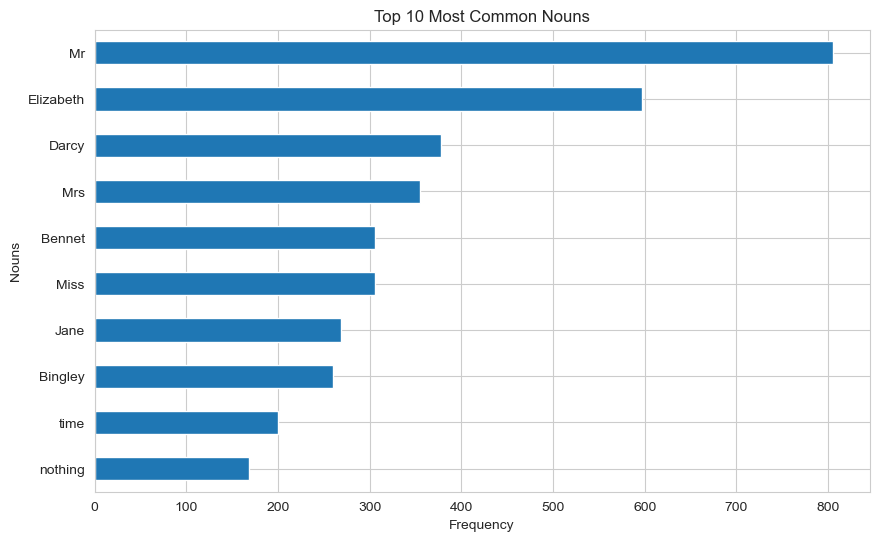

In [17]:
# @title Basic Plotting
import matplotlib.pyplot as plt

# Filter DataFrame for rows where PoS is 'NOUN'
nouns_df = pride_prejudice_df[pride_prejudice_df['PoS'] == 'NOUN']

# Count the occurrences of each noun, find top 10
noun_counts = nouns_df['Word'].value_counts()
top_10_nouns = noun_counts.head(10)

# Plotting
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot
top_10_nouns.plot(kind='barh') # .plot() draws on your canvas, kind = 'barh' decides the plot type, horizontal bar in this case
plt.title('Top 10 Most Common Nouns')
plt.xlabel('Frequency') # Sets the label for the x-axis to 'Frequency'. In a horizontal bar chart, the x-axis typically represents the scale of measurement, which is the frequency of occurrence for each noun in this case.
plt.ylabel('Nouns') # Sets the label for the y-axis to 'Nouns'. Each bar's label on the y-axis corresponds to a noun from your data, identifying what each bar represents.
plt.xticks(rotation=0) # This adjusts the rotation of the tick labels on the x-axis. Setting it to 45 helps in cases where the labels are too large and would overlap.
plt.gca().invert_yaxis()  # Invert y-axis to start with the highest value at the top. gca() gets a matplotlib object representing the plot area, allowing you to modify it directly.
plt.show() # Displays the plot.

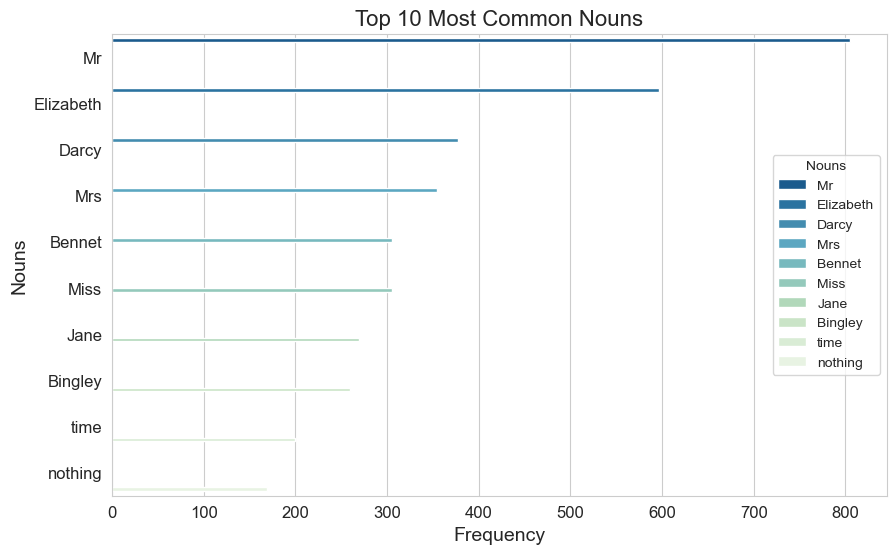

In [18]:
# @title Seaborn Plotting
import seaborn as sns

# Convert the Series to DataFrame for seaborn
top_10_nouns_df = top_10_nouns.reset_index()
top_10_nouns_df.columns = ['Nouns', 'Frequency'] # Converts the Series to a DataFrame and renames columns for clarity, making it compatible with seaborn's data parameter.

# Set the aesthetic style of the plots
sns.set_style("whitegrid") # Applies a white grid background to the plot, providing a clean, modern look that enhances readability.

# Create the plot
plt.figure(figsize=(10, 6)) # figsize=(10, 6) sets the figure size to 10 inches in width and 6 inches in height, providing a canvas for your plot.
sns.barplot(x='Frequency', y='Nouns', data=top_10_nouns_df, palette="GnBu_r", hue='Nouns') # Draws a horizontal bar plot with 'Nouns' on the y-axis and 'Frequency' on the x-axis. Each noun is colored differently based on the 'Blues_d' palette.

# Add titles and labels
plt.title('Top 10 Most Common Nouns', fontsize=16) # Sets the plot title with a font size of 16.
plt.xlabel('Frequency', fontsize=14) # Sets the label for the x-axis to 'Frequency' with a font size of 14. This label indicates that the x-axis represents the frequency of each noun.
plt.ylabel('Nouns', fontsize=14) # Sets the label for the y-axis to 'Nouns' with a font size of 14. Each bar on the y-axis corresponds to a different noun.
plt.xticks(fontsize=12) # Sets the font size of the x-axis tick labels to 12.
plt.yticks(fontsize=12) # Sets the font size of the y-axis tick labels to 12.

# Show the plot
plt.show() # Displays the plot.

In [19]:
# @title Multi-PoS plot { display-mode: "form" }
# Count occurrences of each PoS and find top 10
noun_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'NOUN']['Word'].value_counts().head(10)
verb_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'VERB']['Word'].value_counts().head(10)
adj_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'ADJ']['Word'].value_counts().head(10)
pronoun_counts = pride_prejudice_df[pride_prejudice_df['PoS'] == 'PRON']['Word'].value_counts().head(10)

# Combine the top words into a single DataFrame
top_words_combined = pd.concat([
    noun_counts.rename('Frequency').reset_index().assign(PoS='Noun'),
    verb_counts.rename('Frequency').reset_index().assign(PoS='Verb'),
    adj_counts.rename('Frequency').reset_index().assign(PoS='Adjective'),
    pronoun_counts.rename('Frequency').reset_index().assign(PoS='Pronoun')
])

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='index', y='Frequency', hue='PoS', data=top_words_combined, palette='Set2')
plt.title('Top Words in "Pride and Prejudice" by Part of Speech', fontsize=16)
plt.xlabel('Word', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Part of Speech')
plt.show()

ValueError: Could not interpret input 'index'

<Figure size 1400x800 with 0 Axes>

In [ ]:
# @title Frequency Sorted Multi-PoS Plot

# Assuming top_words_combined is already created from previous cell
# Sort the DataFrame by 'Frequency' in descending order
top_words_sorted = top_words_combined.sort_values(by='Frequency', ascending=False)

# Plot with sorted values
plt.figure(figsize=(14, 10))
sns.barplot(y='index', x='Frequency', hue='PoS', data=top_words_sorted, palette='Set2', dodge=False)
plt.title('Top Words in "Pride and Prejudice" by Frequency Across Parts of Speech', fontsize=16)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Word', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Part of Speech', fontsize=12)
plt.show()

### Exercise 1

 You are going to analyze and compare linguistic features of two texts from different domains.

1. Use two different books to create a dataframe containing columns for 'Word', 'Part of Speech (PoS)', and 'Book'. The 'Book' column should indicate the source book of each word. Ensure you have data from both a scientific text and a literary work.

2. For each book, calculate the percentage of total words that are nouns, verbs, adjectives, and adverbs. This requires counting the occurrences of these parts of speech and dividing by the total number of words in each book.

3. Create two separate plots, one for each book, displaying the top 10 nouns, adjectives, verbs and adverbs appearing in each text.

4. Draw a sorted plot that displays the top 10 words for each book for a PoS of your choice. This plot will contain 20 values (10/book), each value will need to be the relative frequency of the word with respect to its book of origin (word appearances in book / total words in book). Sort the plot by this relative frequency, not by book of origin.

PoS Percentages for 'On the Origin of Species':
PoS
NOUN    24.079508
VERB    17.113109
ADP     16.156176
DET     12.942262
ADJ     10.769049
ADV      7.037388
CONJ     4.200663
PRON     3.848083
PRT      2.392333
NUM      1.427354
X        0.027922
.        0.006152
Name: count, dtype: float64

PoS Percentages for 'Frankenstein':
PoS
NOUN    21.922033
VERB    20.008703
PRON    13.453466
ADP     12.615184
DET     10.875909
ADJ      6.661462
ADV      5.797584
CONJ     5.152555
PRT      2.956384
NUM      0.545203
X        0.011518
Name: count, dtype: float64


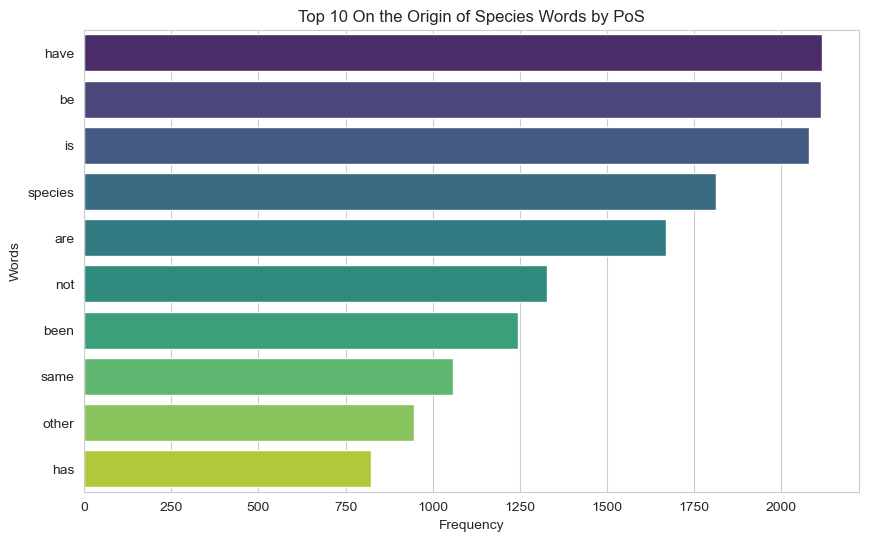

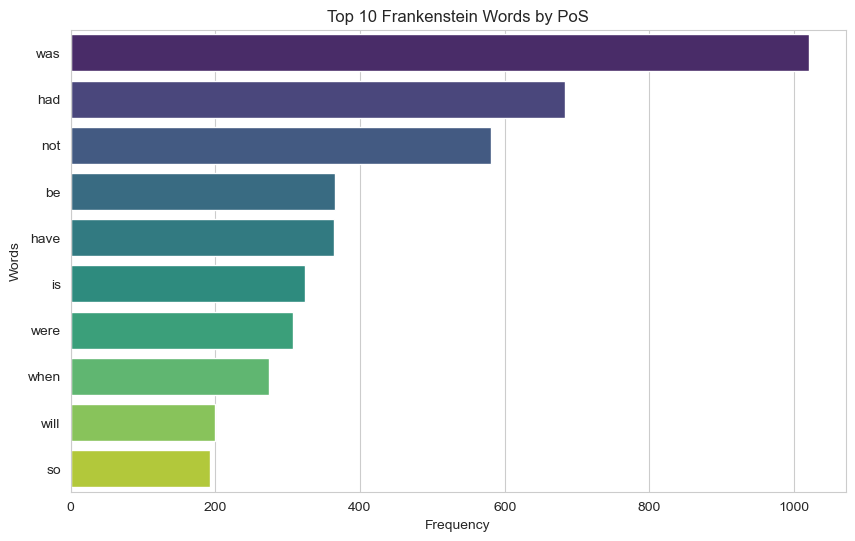

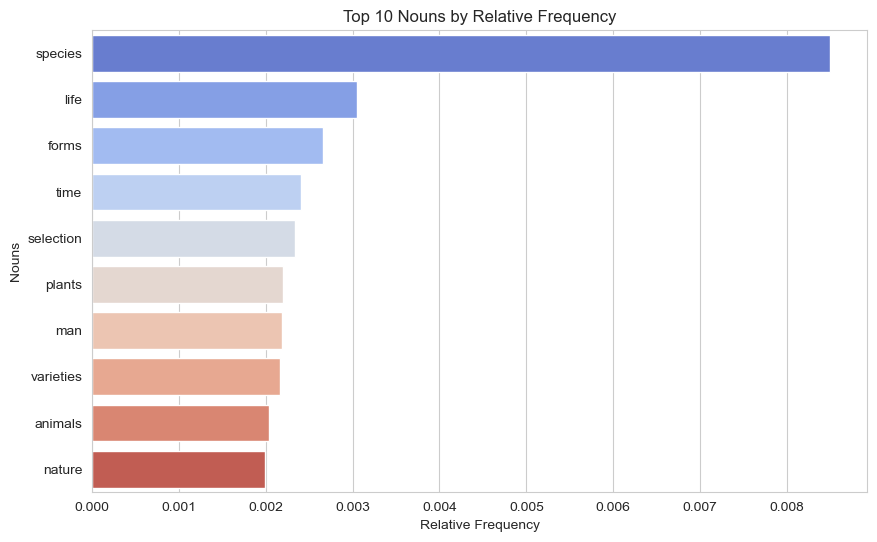

In [22]:
import string
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

darwin_url = 'https://www.gutenberg.org/files/2009/2009-0.txt'
response = requests.get(darwin_url)
darwin_text = response.text

shelley_url = 'https://www.gutenberg.org/files/84/84-0.txt'
response = requests.get(shelley_url)
shelley_text = response.text

allowed_chars = string.ascii_letters + string.digits + string.whitespace
darwin_text = ''.join(c for c in darwin_text if c in allowed_chars)
shelley_text = ''.join(c for c in shelley_text if c in allowed_chars)

darwin_tokens = nltk.word_tokenize(darwin_text)
darwin_pos_tags = nltk.pos_tag(darwin_tokens, tagset='universal')

shelley_tokens = nltk.word_tokenize(shelley_text)
shelley_pos_tags = nltk.pos_tag(shelley_tokens, tagset='universal')

darwin_df = pd.DataFrame(darwin_pos_tags, columns=['Word', 'PoS'])
darwin_df['Book'] = 'On the Origin of Species'

shelley_df = pd.DataFrame(shelley_pos_tags, columns=['Word', 'PoS'])
shelley_df['Book'] = 'Frankenstein'

combined_df = pd.concat([darwin_df, shelley_df], ignore_index=True)

def calculate_pos_percentages(df):
    total_words = len(df)
    pos_counts = df['PoS'].value_counts()
    pos_percentages = (pos_counts / total_words) * 100
    return pos_percentages

darwin_pos_percentages = calculate_pos_percentages(darwin_df)
shelley_pos_percentages = calculate_pos_percentages(shelley_df)

print("PoS Percentages for 'On the Origin of Species':")
print(darwin_pos_percentages)
print("\nPoS Percentages for 'Frankenstein':")
print(shelley_pos_percentages)

def plot_top_pos(df, book_title):
    top_pos_words = df[df['PoS'].isin(['NOUN', 'VERB', 'ADJ', 'ADV'])]['Word'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_pos_words.values, y=top_pos_words.index, palette='viridis')
    plt.title(f'Top 10 {book_title} Words by PoS')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_pos(darwin_df, "On the Origin of Species")
plot_top_pos(shelley_df, "Frankenstein")

darwin_noun_counts = darwin_df[darwin_df['PoS'] == 'NOUN']['Word'].value_counts()
shelley_noun_counts = shelley_df[shelley_df['PoS'] == 'NOUN']['Word'].value_counts()

darwin_total_words = len(darwin_df)
shelley_total_words = len(shelley_df)

darwin_noun_relative_freq = darwin_noun_counts / darwin_total_words
shelley_noun_relative_freq = shelley_noun_counts / shelley_total_words

combined_noun_data = pd.concat([darwin_noun_relative_freq, shelley_noun_relative_freq], axis=1)
combined_noun_data.columns = ['Darwin Relative Frequency', 'Shelley Relative Frequency']

plt.figure(figsize=(10, 6))
sorted_combined_noun_data = combined_noun_data.sum(axis=1).sort_values(ascending=False).head(10)
sns.barplot(x=sorted_combined_noun_data.values, y=sorted_combined_noun_data.index, palette='coolwarm')
plt.title('Top 10 Nouns by Relative Frequency')
plt.xlabel('Relative Frequency')
plt.ylabel('Nouns')
plt.show()

# Named Entity Recognition

**Named Entity Recognition (NER) is a Natural Language Processing (NLP) technique that involves identifying and classifying named entities in text into predefined categories such as person names, organization names, locations, medical codes, etc.**

This extraction of relevant information about entities from text documents can prove useful in tasks such as information retrieval, question answering, text summarization, sentiment analysis, and more.

Nltk has some built-in NER functionality, but it is slower and relatively old, making it quite far from state of the art. For this reason we are going to use a faster and more power library called **spacy**.

Useful spacy documentation - https://spacy.io/usage/linguistic-features

In [25]:
# @title Import spacy and its NER model { display-mode: "form" }
# Remove comment below if spacy is not installed
# !pip install --quiet spacy

# Spacy has 3 CPU-optimized en_core_web models: sm (small - 12MB), md (medium - 40MB), lg (large - 560MB)
!python -m spacy download en_core_web_sm --quiet # Install the smallest en_core_web NER model
# Can replace with any of the larger ones if not bottlenecked by network/cpu

import spacy

# Load the pre-trained model
nlp = spacy.load('en_core_web_sm') # Use en_core_web_sm if en_core_web_lg takes too long to download and load, but it will be at the cost of entity recognition accuracy

ERROR: Invalid requirement: '#'


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# @title NER Demo { display-mode: "form" }
from spacy import displacy

# Define the text to be analyzed
text = "Apple is looking at buying U.K. startup for $1 billion"

# Process the text with spaCy into a doc object
doc = nlp(text)

# Each word from our doc is a spacy Token object with plenty of useful attributes associated to it - https://spacy.io/api/token#attributes
for token in doc:
    print('First token:', token.text, token.pos_, token.ent_type_) # word, part of speech, entity (where available)
    break # we'll stop at first token

# Generate a highlighted visualization of the named entities in the text using displacy
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
# @title Redact names with NER
# Define the text to be analyzed
before_text = "John Smith is a software engineer at Google. He works with Emily White, a data scientist from Boston. Their work involves handling data from European clients."
after_text = before_text

# Process the text with spaCy
doc = nlp(before_text)

# Entities to redact
entities_to_redact = ['PERSON', 'ORG', 'GPE', 'NORP']

# Create a list to hold redacted entities to handle overlaps and repetitions
redactions = []

# Iterate over each named entity in the document
for ent in doc.ents:
    # If the named entity is of a type that needs to be redacted
    if ent.label_ == 'PERSON' and ent.text not in redactions:
        after_text = after_text.replace(ent.text, '[REDACTED]')
        redactions.append(ent.text)  # Add to redactions list to avoid repeat replacements

print("Before Redaction:")
print(before_text)

print("After Redaction:")
print(after_text)

### Exercise 2 - Play a game with your colleagues

Find an English wikipedia article about a famous person, character, organization or event of your choice.


**Redact 4 entity types of your choice from the text.**


**Show the final (redacted) text to a colleague and see if they can tell who the wiki page is about.**

Below you have an example of how to get a wikipedia article based on id and access its content. [Here](https://www.kaggle.com/code/curiousprogrammer/entity-extraction-and-classification-using-spacy?cellId=9&cellIds=9&kernelSessionId=11364473#SpaCy-recognizes-the-following-built-in-entity-types:) you can find the entities supported by spacy, scroll down if not auto-routed.

In [26]:
# We'll use the wikipedia python package to get our page
!pip install wikipedia --quiet

In [28]:
# @title Wiki Example { vertical-output: true, display-mode: "both" }
import wikipedia

# Fetch a wiki page
page = wikipedia.page(pageid='51853') # Example ID for John Doe, find ID by going to Tools -> Page Information -> Page ID

content = page.content
display(content)

'John Doe (male) and Jane Doe (female) are multiple-use placeholder names that are used in the United States and the United Kingdom when the true name of a person is unknown or is being intentionally concealed. In the context of law enforcement in the United States, such names are often used to refer to a corpse whose identity is unknown or cannot be confirmed. These names are also often used to refer to a hypothetical "everyman" in other contexts, in a manner similar to John Q. Public or "Joe Public". There are many variants to the above names, including John (or Richard)/Jane Roe, John/Jane Smith, John/Jane Bloggs, and Johnie/Janie Doe or just Baby Doe for children.\nA. N. Other is also a placeholder name, mainly used in the United Kingdom, which is gender neutral.\n\n\n== In criminal investigation ==\nIn other English-speaking countries, unique placeholder names, numbers or codenames have become more often used in the context of police investigations. This has included the United Ki

In [27]:
import spacy
import wikipedia

# Download the spaCy NER model if not already installed
!python -m spacy download en_core_web_sm --quiet

# Load the spaCy NER model
nlp = spacy.load('en_core_web_sm')

# Define the Wikipedia page title
page_title = "Barack Obama"

# Get the Wikipedia page content
page_content = wikipedia.page(page_title).content

# Process the text with spaCy
doc = nlp(page_content)

# Define the entity types to redact
entities_to_redact = ['PERSON', 'ORG', 'DATE', 'GPE']

# Redact the entities from the text
redacted_text = page_content
for ent in doc.ents:
    if ent.label_ in entities_to_redact:
        redacted_text = redacted_text.replace(ent.text, '[REDACTED]')

# Show the redacted text
print(redacted_text)

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[REDACTED] ( , bə-RAHK hoo-SAYN oh-BAH-mə; born [REDACTED]) is an [REDACTED]n politician who served as the 44th president of [REDACTED] from [REDACTED] to [REDACTED]. A member of [REDACTED], he was the first African-[REDACTED]n  president in [REDACTED] history. [REDACTED] previously served as a [REDACTED] senator representing [REDACTED] from [REDACTED] to [REDACTED], as an [REDACTED] state senator from [REDACTED], and as a civil rights lawyer and university lecturer. 
[REDACTED] was born in [REDACTED], [REDACTED]. He graduated from [REDACTED] in [REDACTED] with a [REDACTED] in political science and later worked as a community organizer in [REDACTED]. In [REDACTED], [REDACTED] enrolled in [REDACTED], where he was the first black president of [REDACTED]. He became a civil rights attorney and an academic, teaching constitutional law at the University of [REDACTED] Law School from [REDACT

### Word dependency parsing
Dependency parsing can be used to extract specific information from a text, such as the subject and object of a sentence or the relationship between two entities. This information can be used to get structured data from unstructured text, which can be useful for tasks such as question answering, knowledge graph construction, etc.



In [30]:
# @title Token dependency demo
from spacy import displacy
sentence = "The cat sat on the mat."

doc = nlp(sentence)

displacy.render(doc, style="dep", options={"compact": True}, jupyter=True)

for token in doc:
    print('Token -', token.text)
    print('Dependency -', token.dep_)
    print('Connected token -', token.head.text)
    break

Token - The
Dependency - det
Connected token - cat


In [ ]:
# @title Naive question generator { display-mode: "form" }
def generate_question(sentence):
    # Process the input sentence with spaCy to get a Doc object containing linguistic annotations
    doc = nlp(sentence)

    # Initialize variables to hold the subject, verb, and object found in the sentence
    subject = None
    verb = None
    obj = None

    # Iterate over each token (word) in the processed sentence
    for token in doc:
        # If the token's dependency label is 'nsubj' (nominal subject), store its text as the subject
        if token.dep_ == "nsubj":
            subject = token.text
        # If the token is the root of the sentence (main verb), store its lemma as the verb
        # The lemma is the base form of the word, ensuring consistency (e.g., "run" instead of "runs" or "running")
        elif token.dep_ == "ROOT":
            verb = token.lemma_
        # If the token's dependency label is 'dobj' (direct object), store its text as the object
        elif token.dep_ == "dobj":
            obj = token.text

    # Check if both subject and verb were found in the sentence
    if subject is not None and verb is not None:
        # If an object is also found, formulate a question asking what the subject did (verb) to the object
        if obj is not None:
            question = f"What did {subject} {verb}?"
        # If no object is found, formulate a more general question about what the subject does
        else:
            question = f"What does {subject} {verb}?"
        # Return the generated question
        return question
    else:
        # If no subject or verb could be identified, indicate that a question cannot be generated
        print("No subject or verb found")
        return None

# Example usage of the function
input_sentence = "Michael sent her flowers"
# Call the function with the input sentence and store the generated question
question = generate_question(input_sentence)
# Print the generated question
print("Generated question:", question)

### Exercise 3
Create a text summarizer using NER and dependency parsing.

1. Implement a Key Sentence Extractor:

    Use spaCy to process a given text and identify the most important sentences based on number of named entity occurences.
    Extract the top 10% (can make this parameter adjustable) of sentences deemed most important and return them as a list.

2. Summarize Extracted Sentences:
    *  For each sentence extracted in Part 1, further process it to identify its main subject, verb (root), and direct object (if present) using spaCy's dependency parsing.
    *  Construct a simplified summary sentence that uses these 3 components that should capture the essence of the original sentence.
    *  Return a list of these summarized sentences.
3. Extend the Summarization to add more useful information.

    Enhance your summarization function from Part 2 to also consider and include prepositional phrases or indirect objects related to the main verb, aiming to add more context and detail to each summary sentence.


In [40]:
import spacy

nlp = spacy.load('en_core_web_sm')

def key_sentence_extractor(text, top_percentage=10):
    doc = nlp(text)
    sentence_entity_counts = []
    for sent in doc.sents:
        entity_count = sum(1 for ent in sent.ents)
        sentence_entity_counts.append((sent, entity_count))
    sorted_sentences = sorted(sentence_entity_counts, key=lambda x: x[1], reverse=True)
    top_sentences_count = int(len(sorted_sentences) * top_percentage)
    top_sentences = [sentence for sentence, _ in sorted_sentences[:top_sentences_count]]
    return top_sentences

def summarize_extracted_sentences(sentences):
    summarized_sentences = []
    for sentence in sentences:
        doc = nlp(sentence.text)
        subject = None
        verb = None
        obj = None
        for token in doc:
            if token.dep_ == 'nsubj':
                subject = token.text
            elif token.dep_ == 'ROOT':
                verb = token.text
            elif token.dep_ == 'dobj':
                obj = token.text
        summary_sentence = f"{subject} {verb}"
        if obj:
            summary_sentence += f" {obj}"
        summarized_sentences.append(summary_sentence)
    return summarized_sentences

def extend_summarization(sentences):
    extended_summaries = []
    for sentence in sentences:
        doc = nlp(sentence.text)
        subject = None
        verb = None
        obj = None
        prep_phrases = []
        for token in doc:
            if token.dep_ == 'nsubj':
                subject = token.text
            elif token.dep_ == 'ROOT':
                verb = token.text
            elif token.dep_ == 'dobj':
                obj = token.text
            elif token.dep_ == 'prep':
                prep_phrases.append(token.text + " " + token.head.text)
        extended_summary = f"{subject} {verb}"
        if obj:
            extended_summary += f" {obj}"
        if prep_phrases:
            extended_summary += f", {' '.join(prep_phrases)}"
        extended_summaries.append(extended_summary)
    return extended_summaries

text = """
Barack Obama was born in Hawaii on August 4, 1961. He served as the 44th President of the United States from 2009 to 2017.
During his presidency, Obama signed many landmark bills into law, including the Affordable Care Act.
He is married to Michelle Obama, and they have two daughters, Malia and Sasha.
"""

key_sentences = key_sentence_extractor(text)

print("Extracted Key Sentences:")
for sentence in key_sentences:
    print(sentence.text)

summarized_sentences = summarize_extracted_sentences(key_sentences)

print("\nSummarized Sentences:")
for sentence in summarized_sentences:
    print(sentence)

extended_summaries = extend_summarization(key_sentences)

print("\nExtended Summaries:")
for sentence in extended_summaries:
    print(sentence)


Extracted Key Sentences:
He served as the 44th President of the United States from 2009 to 2017.

He is married to Michelle Obama, and they have two daughters, Malia and Sasha.


Barack Obama was born in Hawaii on August 4, 1961.
During his presidency, Obama signed many landmark bills into law, including the Affordable Care Act.


Summarized Sentences:
He served
they is daughters
None born
Obama signed bills

Extended Summaries:
He served, as served of President from served to from
they is daughters, to married
None born, in born on born
Obama signed bills, During signed into signed including law


# Exercise 4
Explore patterns in text through PoS/NER tagging.

1. Construct a dataframe from **four long-form texts** (>5000 words), each coming from distinct genres (e.g., fiction, non-fiction, academic, history, etc.). The dataframe should contain the **genre, word, NER and PoS columns**.

    NER column will contain the **entity type** of the word (e.g. person, date) obtained using spacy, PoS column will contain the **PoS tag** of the word (e.g. verb, noun) obtained using spacy or nltk.

2. Select a part of speech of your choice (e.g. VERB, ADJECTIVE, ..) and plot the top 10 word occurrences for that POS for each genre. Can use 4 separate plots or do it all in one.

3. Compute and plot the frequency of all different entity types **grouped by genre**. Visualize this distribution with a bar chart, highlighting which entities are most common in different domains. You can use either absolute (number of occurrences) or relative values (number of occurrences / total words in genre) in your visualizations. Similarly to 4.2, design of the plot is up to you.

4. Calculate and plot the distribution of POS tags among genres.  Use a pie chart to illustrate the proportion of different parts of speech, providing insights into the linguistic preferences of each domain's texts. Absolute or relative values are again up for choice. One or 4 plots up for choice.


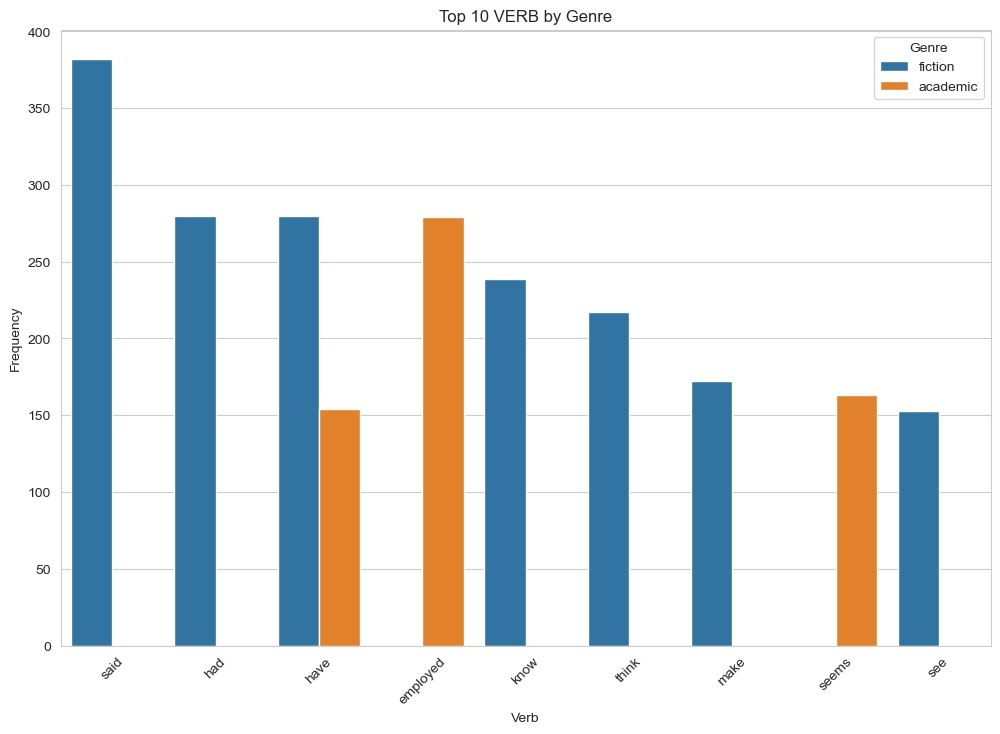

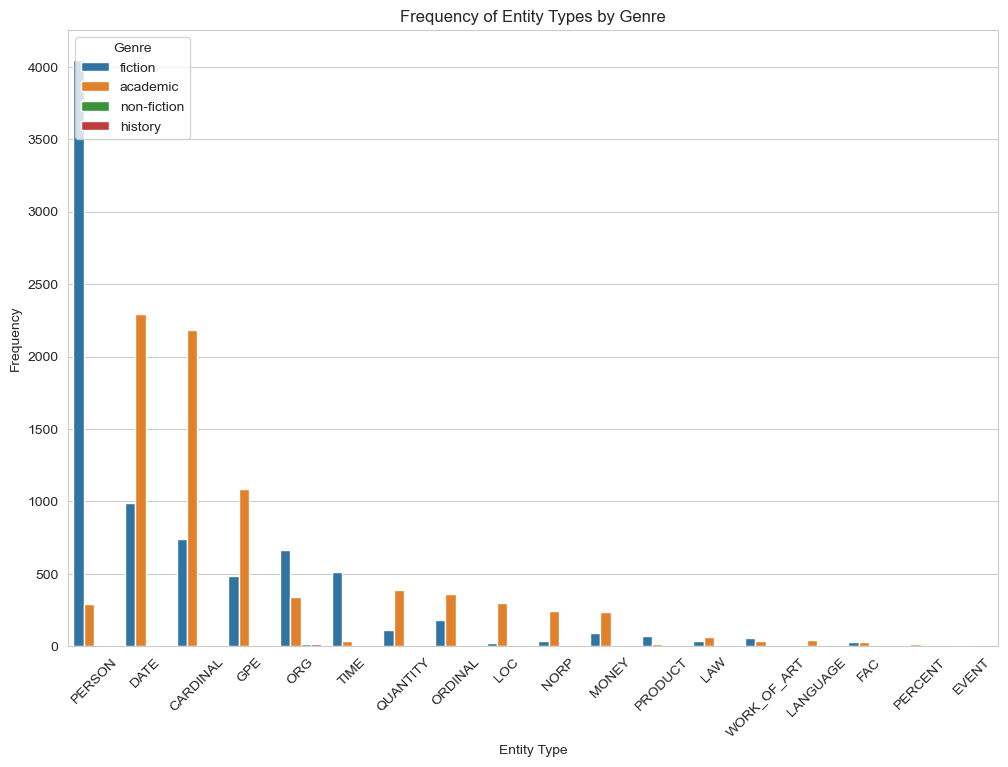

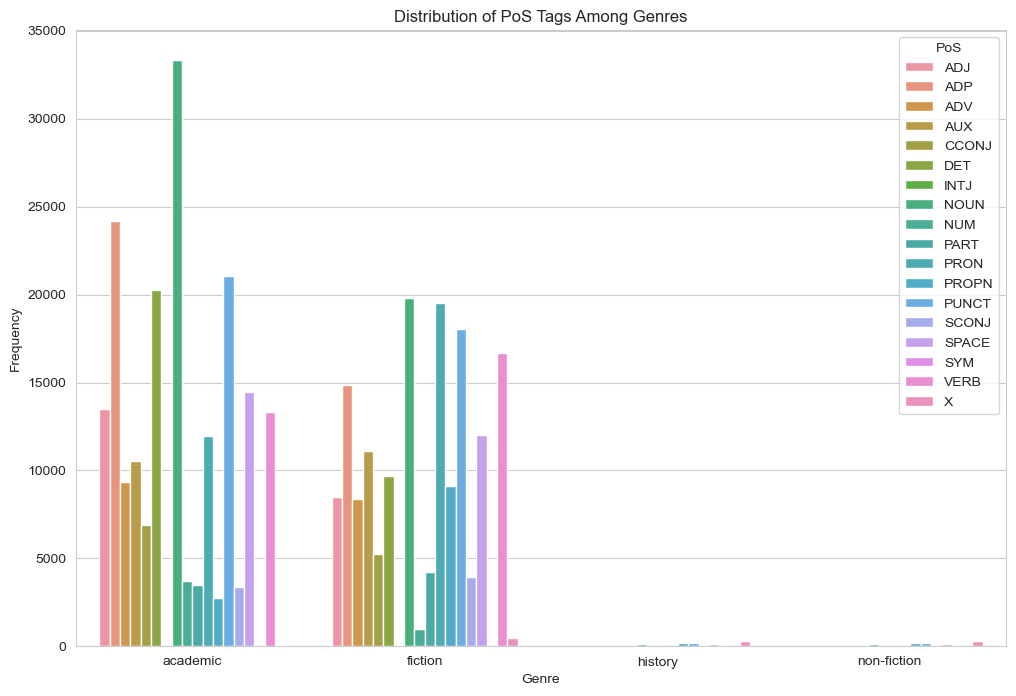

In [42]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

nlp = spacy.load("en_core_web_sm")

# Texts from distinct genres



# URLs for the books
book_urls = {
    "Pride and Prejudice": "https://www.gutenberg.org/files/1342/1342-0.txt",
    "The Diary of a Young Girl": "https://www.gutenberg.org/files/33383/33383-0.txt",
    "The Wealth of Nations": "https://www.gutenberg.org/files/3300/3300-0.txt",
    "The Histories": "https://www.gutenberg.org/files/2707/2707-0.txt"
}

# Function to download a book using the provided model
def download_book(url):
    response = requests.get(url)
    return response.text

# Download each book
books = {}
for book_title, book_url in book_urls.items():
    books[book_title] = download_book(book_url)

texts = {
    "fiction": books["Pride and Prejudice"][:1000000],
    "non-fiction": books["The Diary of a Young Girl"][:1000000],
    "academic": books["The Wealth of Nations"][:1000000],
    "history": books["The Histories"][:1000000]
}

# Function to process text and extract NER and PoS tags
def process_text(text):
    doc = nlp(text)
    data = []
    for token in doc:
        data.append((token.text, token.ent_type_, token.pos_))
    return data

# Construct DataFrame
dfs = []
for genre, text in texts.items():
    processed_data = process_text(text)
    df = pd.DataFrame(processed_data, columns=["Word", "NER", "PoS"])
    df["Genre"] = genre
    dfs.append(df)

# Concatenate DataFrames
df = pd.concat(dfs)

# Select a part of speech (e.g., VERB) for analysis
pos_of_interest = "VERB"
top_verbs_by_genre = df[df["PoS"] == pos_of_interest].groupby(["Genre", "Word"]).size().reset_index(name="Count")

# Plot top 10 verbs for each genre
plt.figure(figsize=(12, 8))
sns.barplot(x="Word", y="Count", hue="Genre", data=top_verbs_by_genre.sort_values(by="Count", ascending=False).head(10))
plt.title(f"Top 10 {pos_of_interest} by Genre")
plt.xlabel("Verb")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Genre")
plt.show()

# Plot frequency of different entity types grouped by genre
entity_freq_by_genre = df[df["NER"] != ""].groupby(["Genre", "NER"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 8))
sns.barplot(x="NER", y="Count", hue="Genre", data=entity_freq_by_genre.sort_values(by="Count", ascending=False))
plt.title("Frequency of Entity Types by Genre")
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Genre")
plt.show()

# Plot distribution of PoS tags among genres
pos_distribution = df.groupby(["Genre", "PoS"]).size().reset_index(name="Count")

plt.figure(figsize=(12, 8))
sns.barplot(x="Genre", y="Count", hue="PoS", data=pos_distribution)
plt.title("Distribution of PoS Tags Among Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.legend(title="PoS")
plt.show()